# O Campeonato Brasileiro está ficando mais injusto? (utilização do coeficiente de Gini)

## Introdução

A cerca da mudança da maneira que é organizada o Futebol no Brasil e no mundo, surgiu o fenômeno de disparidades entre clubes mundo a fora. Muitos regogizam-se do campeonato brasileiro ser um dos mais equilibrados do mundo, porém será que essa afirmação continua sendo verdadeira até os dias atuais? É isso que vamos analisar agora.

### O Campeonato Brasileiro está ficando mais injusto?
[Dataset](https://https://github.com/v-macrev/brasileirao-data-mining/blob/main/dataset-2003-2021.csv)   

## A desigualdade estrutural no Campeonato Brasileiro é uma tendência?

Na última edição, o campeonato terminou com uma larga folga do campeão Atlético-MG, abrindo uma distância de 13 pontos do vice-campeão, o Flamengo. 

Outro acontecimento extremamente relevante nessa última edição foi a pior campanha dos pontos corridos de 20 clubes na história, protagonizada pela Chapecoense, a qual conquistou somente 15 pontos.


E tomando essas duas situações como ponto de partida, aparentemente o grau de disparidade entre clubes tem aumentado no decorrer dos anos, e isso que será buscado aqui.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('fivethirtyeight')

df_brasileirao = pd.read_csv('dataset-2003-2021.csv', delimiter=';')

print(f'Number of Records: {df_brasileirao.shape[0]} - Number of Columns: {df_brasileirao.shape[1]}')

df_brasileirao.tail(20)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Number of Records: 390 - Number of Columns: 12


,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
370,2021,1,Atlético Mineiro,84,38,26,6,6,67,34,33,73
371,2021,2,Flamengo,71,38,21,8,9,69,36,33,62
372,2021,3,Palmeiras,66,38,20,6,12,58,43,15,57
373,2021,4,Fortaleza,58,38,17,7,14,44,45,-1,58
374,2021,5,Corinthians,57,38,15,12,11,40,36,4,50
375,2021,6,Bragantino,56,38,14,14,10,55,46,9,49
376,2021,7,Fluminense,54,38,15,9,14,38,38,0,47
377,2021,8,América Mineiro,53,38,13,14,11,41,37,4,46
378,2021,9,Atlético-GO,53,38,13,14,11,33,36,-3,46
379,2021,10,Santos,50,38,12,14,12,35,40,-5,43


In [39]:
def gini(arr, eps=1e-8):
    '''
    Reference: PyGini
    https://github.com/mckib2/pygini/blob/master/pygini/gini.py
    
    Calculate the Gini coefficient of a numpy array.
    Notes
    -----
    Based on bottom eq on [2]_.
    References
    ----------
    .. [2]_ http://www.statsdirect.com/help/
            default.htm#nonparametric_methods/gini.htm
    '''

    # All values are treated equally, arrays must be 1d and > 0:
    arr = np.abs(arr).flatten() + eps

    # Values must be sorted:
    arr = np.sort(arr)

    # Index per array element:
    index = np.arange(1, arr.shape[0]+1)

    # Number of array elements:
    N = arr.shape[0]

    # Gini coefficient:
    return(np.sum((2*index - N - 1)*arr))/(N*np.sum(arr))


def get_gini_df(df):
    """Generate DF with Gini Index

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data

    Returns
    -------
    gini_df : Pandas Dataframe
      Returns a Pandas Dataframe with the year, team and gini index

    """    
    gini_per_year = []
    
    for year in df['year'].unique():
        championship_index = gini(np.array(df[df['year'] == year]['points']))
        champion = (df[(df['year'] == year) & (df['position'] == 1)]['team'])
        gini_per_year.append((year, champion.values[0], round(championship_index, 4)))
        
    gini_df = pd.DataFrame(gini_per_year)
    gini_df.columns = ['year', 'team', 'gini']
    
    # Indexing the date field for graph it smoothly
    gini_df.set_index('year', inplace=True)

    return gini_df

## Ranking de desigualdade entre todas as edições do Brasileirão usando o Coeficiente de Gini

In [40]:
gini_df = get_gini_df(df_brasileirao)
gini_df.sort_values(by=['gini'], ascending=False)

,team,gini
year,,
2019,Flamengo,0.1746
2018,Palmeiras,0.1449
2014,Cruzeiro,0.1413
2020,Flamengo,0.1366
2012,Fluminense,0.1355
2016,Palmeiras,0.1349
2010,Fluminense,0.1318
2021,Atlético Mineiro,0.1316
2006,São Paulo,0.1287


In [53]:
df_brasileirao[df_brasileirao['year'] == 2003]

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
0,2003,1,Cruzeiro,100,46,31,7,8,102,47,55,72
1,2003,2,Santos,87,46,25,12,9,93,60,33,63
2,2003,3,São Paulo,78,46,22,12,12,81,67,14,56
3,2003,4,São Caetano,74,46,19,14,13,53,37,16,53
4,2003,5,Coritiba,73,46,21,10,15,67,58,9,52
5,2003,6,Internacional,72,46,20,10,16,59,57,2,52
6,2003,7,Atlético Mineiro,72,46,19,15,12,76,62,14,52
7,2003,8,Flamengo,66,46,18,12,16,66,73,–7,47
8,2003,9,Goiás,65,46,18,11,17,78,63,15,47
9,2003,10,Paraná,65,46,18,11,17,85,75,10,47


In [54]:
df_brasileirao[df_brasileirao['position'] == 20].describe()

,year,position,points,games,victories,draws,losses,goals_scored,goals_against,perc_points_won
count,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2012.000000,20.0,30.526316,39.052632,7.000000,9.684211,22.368421,35.526316,65.684211,25.684211
std,5.627314,0.0,10.156380,2.613505,3.109126,2.906939,2.832559,12.933026,8.787950,7.047873
min,2003.000000,20.0,15.000000,38.000000,1.000000,5.000000,17.000000,18.000000,48.000000,13.000000
25%,2007.500000,20.0,25.000000,38.000000,5.000000,8.000000,21.000000,25.000000,58.500000,22.000000
50%,2012.000000,20.0,30.000000,38.000000,7.000000,10.000000,21.000000,37.000000,67.000000,26.000000
75%,2016.500000,20.0,33.500000,38.000000,8.000000,11.000000,24.000000,43.000000,71.500000,29.000000
max,2021.000000,20.0,51.000000,46.000000,13.000000,18.000000,29.000000,62.000000,80.000000,37.000000


In [55]:
df_brasileirao[df_brasileirao['position'] == 16].describe()

,year,position,points,games,victories,draws,losses,goals_scored,goals_against,perc_points_won
count,19.000000,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2012.000000,16.0,45.105263,39.052632,11.578947,10.578947,16.894737,46.210526,54.631579,38.473684
std,5.627314,0.0,4.544774,2.613505,1.464991,2.292882,2.258188,9.449156,9.575493,2.169701
min,2003.000000,16.0,39.000000,38.000000,10.000000,6.000000,13.000000,34.000000,41.000000,34.000000
25%,2007.500000,16.0,43.000000,38.000000,11.000000,9.000000,15.500000,37.500000,47.000000,37.500000
50%,2012.000000,16.0,44.000000,38.000000,11.000000,11.000000,17.000000,48.000000,54.000000,39.000000
75%,2016.500000,16.0,45.500000,38.000000,12.000000,12.500000,18.500000,50.500000,60.500000,39.500000
max,2021.000000,16.0,56.000000,46.000000,15.000000,15.000000,20.000000,65.000000,72.000000,43.000000


In [56]:
df_brasileirao[df_brasileirao['position'] == 16]

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
15,2003,16,Vitória,56,46,15,11,20,50,64,–14,40
39,2004,16,Vasco da Gama,54,46,14,12,20,64,68,-4,39
63,2005,16,Figueirense,53,42,14,11,17,65,72,–7,42
85,2006,16,Palmeiras,44,38,12,8,18,58,70,-12,39
105,2007,16,Goiás,45,38,13,6,19,49,62,-13,39
125,2008,16,Náutico,44,38,11,11,16,44,54,–10,38
145,2009,16,Fluminense,46,38,11,13,14,49,56,-7,40
165,2010,16,Atlético Goianiense,42,38,11,9,18,51,57,-6,37
185,2011,16,Cruzeiro,43,38,11,10,17,48,51,-3,37
205,2012,16,Portuguesa,45,38,10,15,13,39,41,–2,39


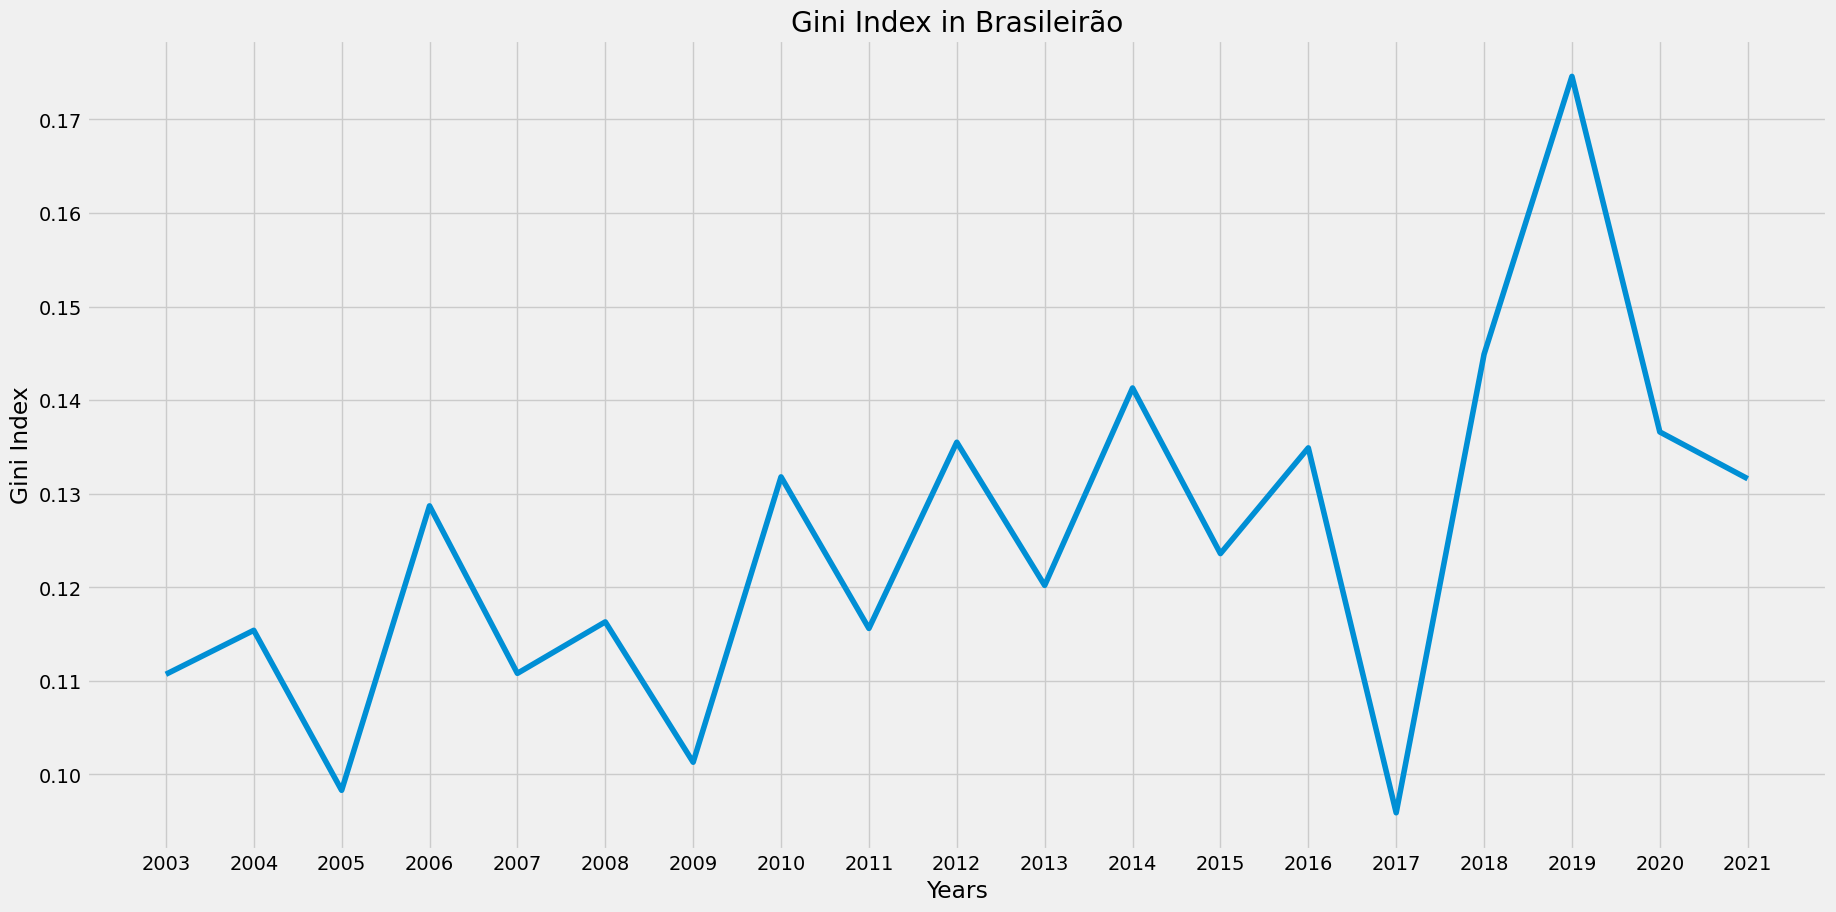

In [57]:
def get_graph_ts(df, column, title, label):
    """Generate graph of a Time Series

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    column : string
      Column with the metric to be ploted
    title : string
      Graph title to be displayed
    label : string
      Name of the series that will be placed
      as legend
      
    Returns
    -------      

    """      
    plt.figure(figsize=(20,10))
    plt.title(title)
    plt.xlabel('Years')
    plt.ylabel('Gini Index')
    plt.plot(df[column], label=label)
    plt.xticks(gini_df.index)
    
get_graph_ts(gini_df,
             'gini',
             'Gini Index in Brasileirão',
             'Gini Index',
            )

Mais uma vez vamos considerar a média móvel considerando os ultimos 3 campeonatos.

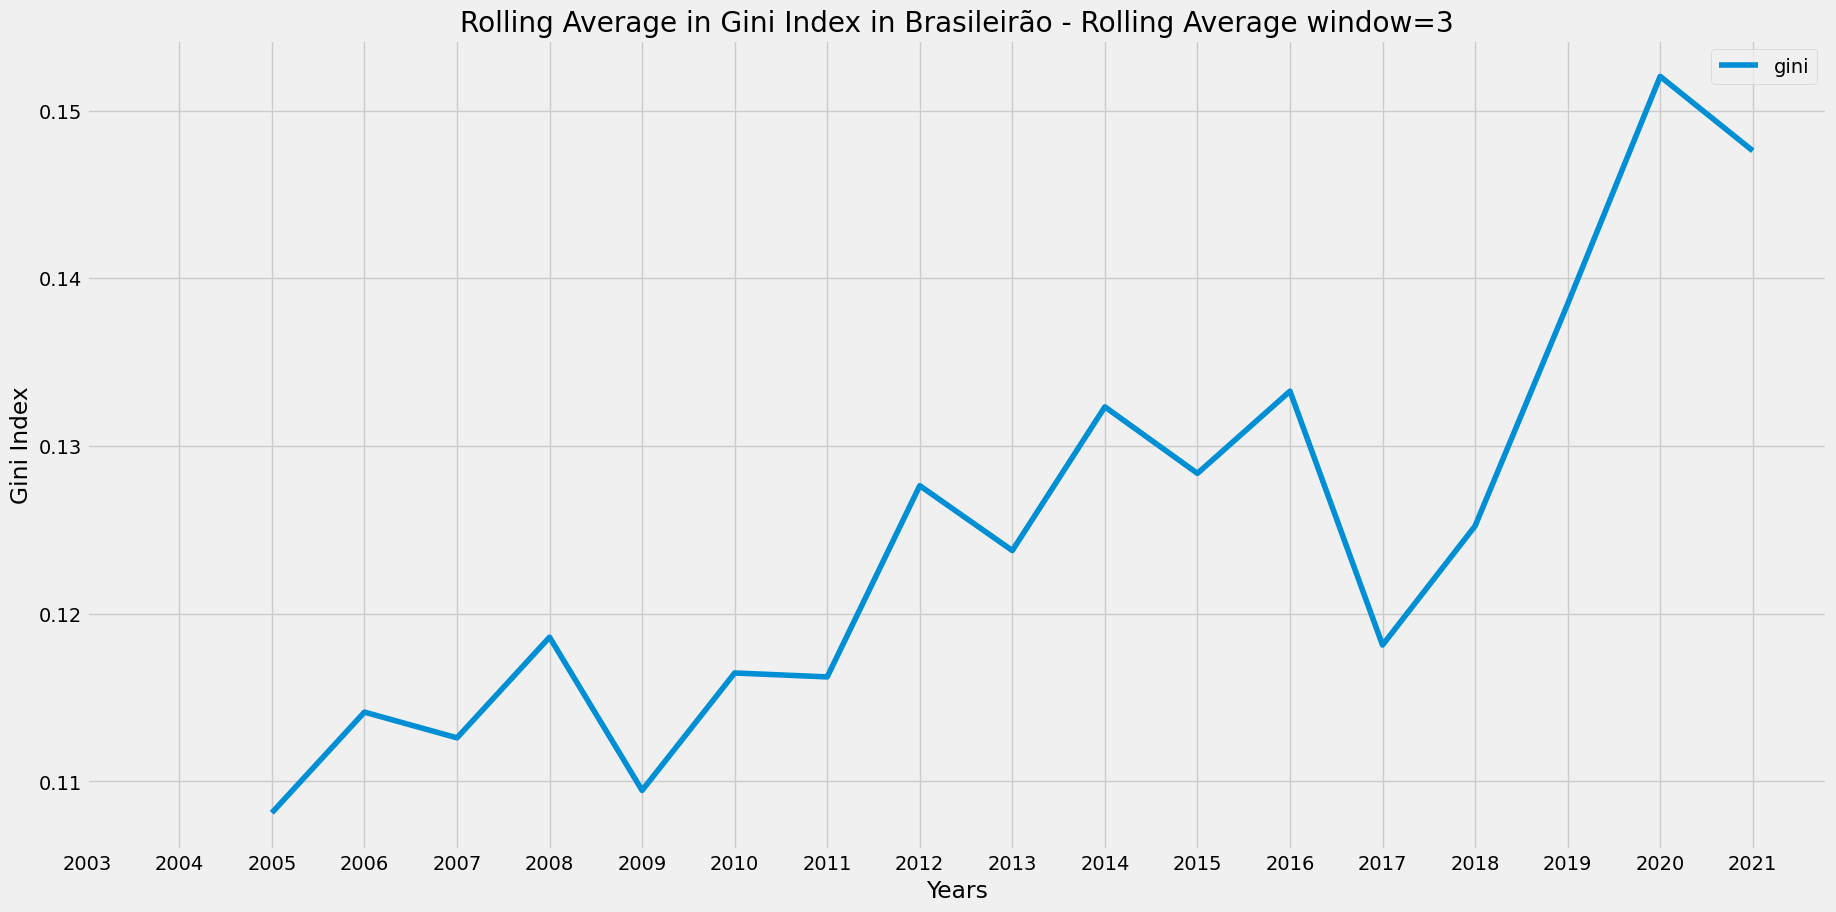

In [58]:
# Some graphs with rolling average
date_range = [2003, 2004, 2005, 2006, 2007,
              2008, 2009, 2010, 2011, 2012,
              2013, 2014, 2015, 2016, 2017,
              2018, 2019, 2020, 2021]

def get_graph_ts_rolling_average(ts, title, window, date_range=date_range):
    """Generate graph of a Time Series with a simple rolling average

    Parameters
    ----------
    ts : Pandas Dataframe column
      Dataframe column with a metric to be ploted
    title : Pandas Dataframe
      Graph title to be displayed
    window : int
      Rolling back window to be considered in the average
    date_range : Array
      Array to be used in the ploting. Matplotlib has a 
      very bad way to deal with that, so I need to use this
      workaround to place all years properly
      

    Returns
    -------

    """      
    plt.figure(figsize=(20,10))
    plt.plot(date_range, ts.rolling(window=window, center=False).mean(), label='gini');
    plt.title(f'{title}{window}')
    plt.xlabel('Years')
    plt.ylabel('Gini Index')
    plt.xticks(gini_df.index)
    plt.legend()
    
get_graph_ts_rolling_average(gini_df['gini'],
                             'Rolling Average in Gini Index in Brasileirão - Rolling Average window=',
                             3,
                            )    

Podemos ver que considerando a média movel igual a 3, temos um aumento do ginide quase 3 pontos em 4 anos. 

Aos moldes do post anterior, vamos remover o campeão e o pior time de todas as temporadas e recalcular novamente. 

In [59]:
def get_brasileirao_no_outliers(df):
    """Generate a DF removing the champion and the worst team of the championship

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    Returns
    -------
    df_concat : Pandas Dataframe
     Returns a Pandas Dataframe without the outliers

    """    
    
    df_concat = pd.DataFrame()

    for year in df['year'].unique():
        pos_min = df[df['year'] == year]['position'].min()
        pos_max = df[df['year'] == year]['position'].max()

        df_filtered = df[(df['year'] == year) \
                         & (~df['position'].isin([pos_min, pos_max]))]

        df_concat = df_concat.append(df_filtered)
    
    return df_concat


def get_gini(df):   
    """Generate a DF with the year and the following Gini Index calculated

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    Returns
    -------
    gini_df : Pandas Dataframe
     Returns a Pandas Dataframe with the year, and gini index    

    """  
    gini_per_year = []
    for year in df['year'].unique():
        championship_index = gini(np.array(df[df['year'] == year]['points']))
        gini_per_year.append((year, round(championship_index, 4)))
        
    gini_df = pd.DataFrame(gini_per_year)
    gini_df.columns = ['year', 'gini']
    
    # Indexing the date field for graph it smoothly
    gini_df.set_index('year', inplace=True)
        
    return gini_df

In [60]:
# Outlier removal
df_brasileirao_no_outliers = get_brasileirao_no_outliers(df_brasileirao)

C:\Users\Regenera\AppData\Local\Temp\ipykernel_14812\3770499421.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concat = df_concat.append(df_filtered)
C:\Users\Regenera\AppData\Local\Temp\ipykernel_14812\3770499421.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concat = df_concat.append(df_filtered)
C:\Users\Regenera\AppData\Local\Temp\ipykernel_14812\3770499421.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concat = df_concat.append(df_filtered)
C:\Users\Regenera\AppData\Local\Temp\ipykernel_14812\3770499421.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_concat = df_concat.append(df_filtered)
C:\Users

In [61]:
df_brasileirao_no_outliers_gini = get_gini(df_brasileirao_no_outliers)
df_brasileirao_no_outliers_gini.sort_values(by=['gini'], ascending=False)

,gini
year,
2019,0.1376
2014,0.1217
2020,0.1180
2012,0.1145
2018,0.1139
2010,0.1129
2016,0.1084
2006,0.1029
2004,0.0994


Mesmo removendo o Botafogo (pior time) e o Campeão (Flamengo) **ainda sim o campeonato de 2020 continua o terceiro mais desigual**. 

Vamos gerar o gráfico apenas para verificar se a tendência do aumento da desigualdade permanece ou não.

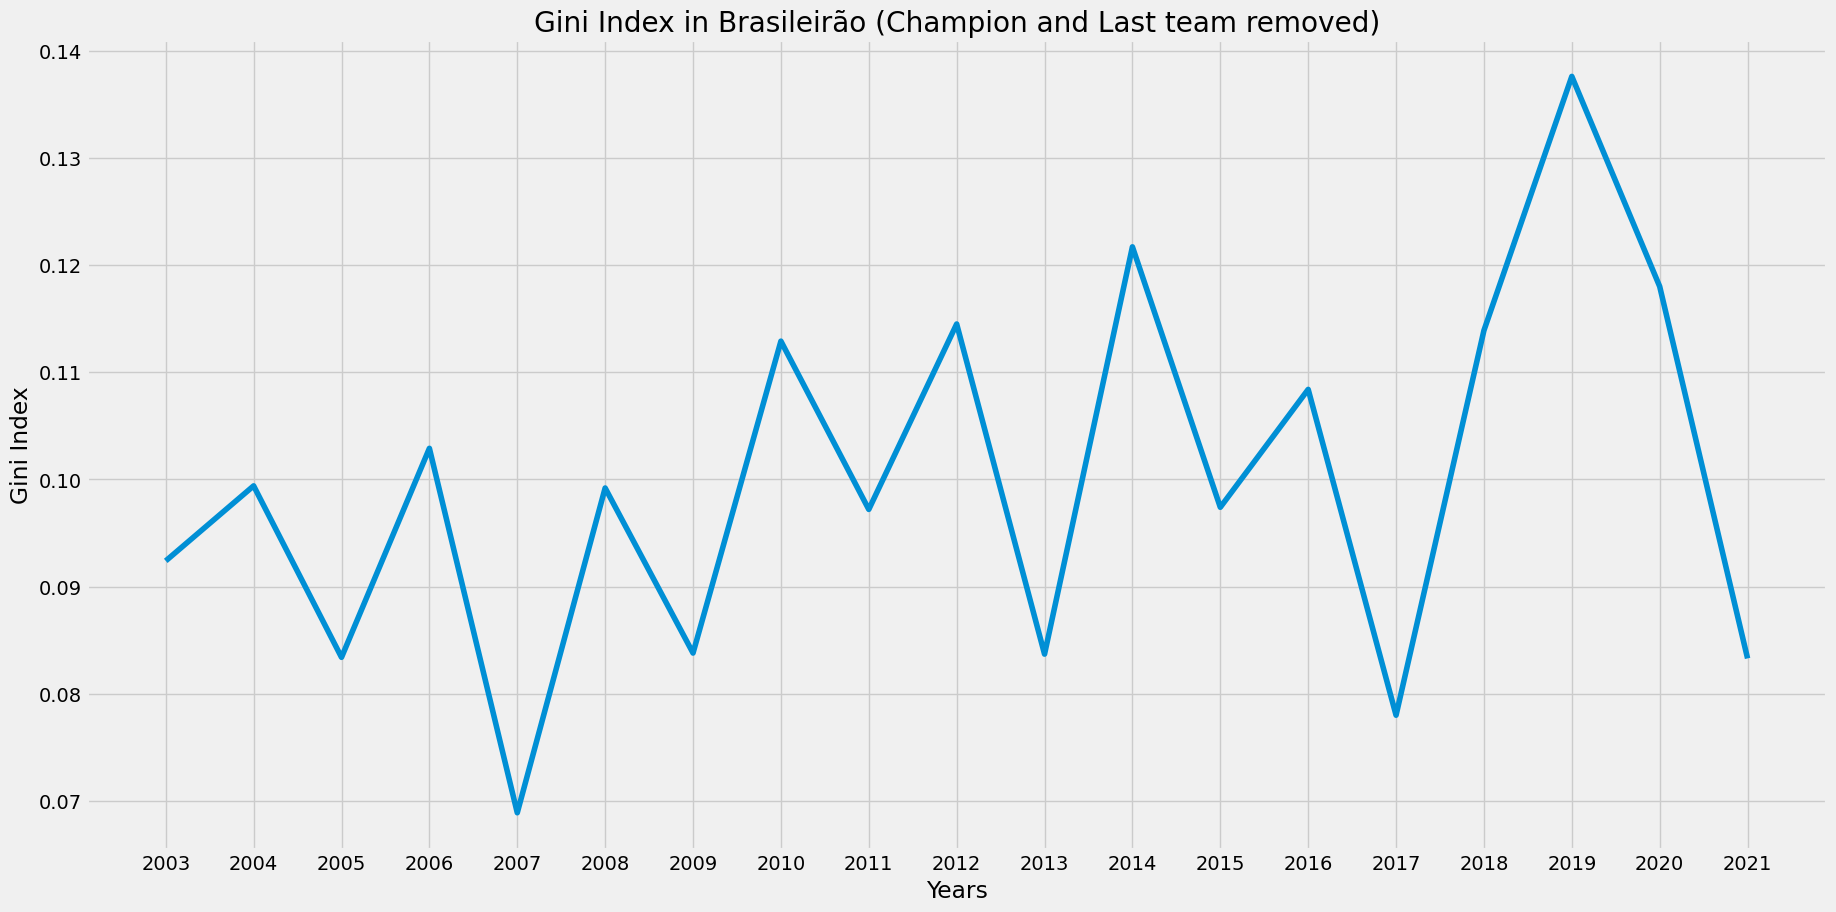

In [62]:
get_graph_ts(df_brasileirao_no_outliers_gini,
             'gini',
             'Gini Index in Brasileirão (Champion and Last team removed)',
             'Gini Index',
            )

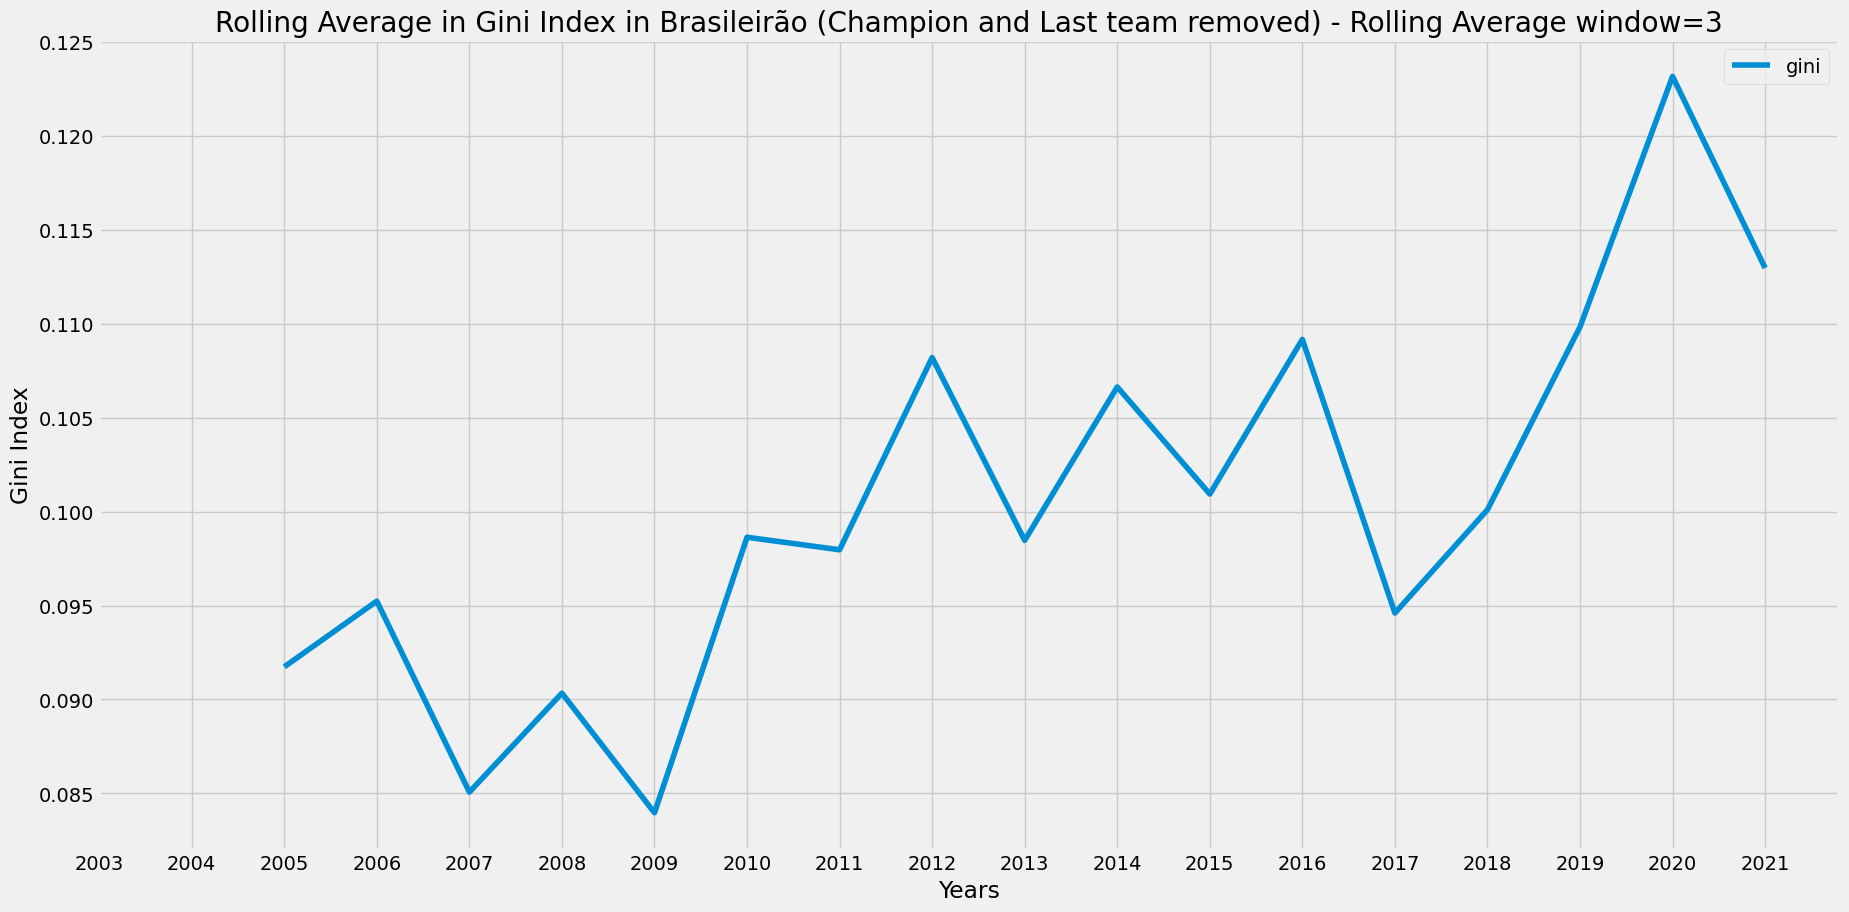

In [63]:
get_graph_ts_rolling_average(df_brasileirao_no_outliers_gini['gini'],
                             'Rolling Average in Gini Index in Brasileirão (Champion and Last team removed) - Rolling Average window=',
                             3,
                            )    

Olhando o Coeficiente de Gini removendo o campeão e o pior time, **podemos ver que ainda temos a tendência de aumento da desigualdade dentro da liga**.


## Conclusão e considerações para o futuro
Se tivermos que responder a nossa pergunta principal que foi "**O brasileirão está ficando mais injusto ao longo do tempo?**" a resposta seria:  


**"Sim. Existe uma esigualdade estrutural no Campeonato Brasileiro com uma tendência de alta, sendo que a edição de 2019 foi a mais desigual de todas e com essa desigualdade sendo sustentada depois do campeonato de 2020."**.  

Aqui eu vou tomar a liberdade de realizar algumas considerações em relação ao que eu penso que pode estar acontecendo no Campeonato:

#### Conclusões de 2019

   - A [disparidade financeira](https://blogdomenon.blogosfera.uol.com.br/2019/08/08/aumenta-a-disparidade-financeira-entre-clubes-brasileiros/) é uma realidade. O Palmeiras que é um dos clubes que mais investem dinheiro têm foi **campeão 2 vezes, vice e 3o colocado**. [O Flamengo que fez investimentos na ordem de mais de 100 milhões de reais](https://globoesporte.globo.com/futebol/times/flamengo/noticia/flamengo-se-aproxima-de-r-200-mi-em-reforcos-no-ano-e-busca-dois-nomes-para-fechar-o-elenco.ghtml) mostrou que **gastar é o nome do jogo**;
   
   - Com essa _race arms_ em relação ao dinheiro e o seu papel na liga, o que vai acontecer **é que os investimentos vão ter que ser certeiros pois o risco de haver frustração de receitas e de títulos é muito grande**, [dado que o campeão ganha em dinheiro o equivalente a apenas 6 meses de salários](https://www.goal.com/br/not%C3%ADcias/brasileirao-2019-veja-a-premiacao-em-dinheiro-que-cada-time/wodfl5qh5cbr1hvme355b4zw8). Ou seja, quem não for campeão corre o risco o real de tomar prejuízos massivos;
   
   - Dado o que foi colocado acima, eu penso que os Supertimes estão para ficar e todos os outros times que vão ficar apenas disputando vagas em competições continentais vão ficar muito mais prudentes nas contratações. Em outras palavras: **Se não for para ser campeão, invista apenas o suficiente para levar o time para algum campeonato em que tenha jogos de mata-mata**, estes sim que aumentam as chances de ser campeão mesmo com elencos não milionários [como o já mostrou o Atlhetico Paranaense que ganhou uma Copa Sulamericana e uma Copa do Brasil em 2 anos](https://brasil.elpais.com/brasil/2019/09/19/deportes/1568908922_220732.html).


#### Conclusões de 2020
   - Como é de conhecimento de todos, o campeonato foi disputado em uma situação extremamente dinâmica por conta da pandemia, o que pode ter um efeito de causal em relação às disparidades citadas acima;

Por inspiração de uma interação que eu tive no Twitter com [Tiago Vinhoza - @tiagotvv](https://twitter.com/tiagotvv/status/1201887496788987905) eu vou coletar os dados das ligas européias desde a década de 90 e analisar se essa desigualdade acontece nas outras ligas do mundo e comparar com a liga Brasileira. 


## Referências e links úteis

[Inequality in the Premier League - Çınar Baymul](https://towardsdatascience.com/inequality-in-the-premier-league-a3a9a7294d96)  

[An Analysis Of Parity Levels In Soccer - Harvard Sports](http://harvardsportsanalysis.org/2017/08/an-analysis-of-parity-levels-in-soccer/)

[Which Sports League has the Most Parity? - Harvard Sports](http://harvardsportsanalysis.org/2016/12/which-sports-league-has-the-most-parity/)

[Major League Soccer and the Effect of Egalitarianism - Harvard Sports]( http://harvardsportsanalysis.org/2015/03/major-league-soccer-and-the-effect-of-egalitarianism-2/)

[The Gini Coefficient as a Measure of League Competitiveness and Title Uncertainty - Australia Sports Betting]( http://www.aussportsbetting.com/2016/06/15/gini-coefficient-competitiveness-uncertainty/)

[Mourão, P. R., & Teixeira, J. S. (2015). Gini playing soccer. Applied Economics, 47(49), 5229-5246](https://www.tandfonline.com/doi/abs/10.1080/00036846.2015.1044650)

[How "fair" are European soccer leagues? Gini index applied to points distribution of 5 soccer leagues between 2000 and 2015 - r/soccer](https://www.reddit.com/r/soccer/comments/3pnjv3/how_fair_are_european_soccer_leagues_gini_index/)

[Footballomics: Estimating League Disparity Performance with a Point-Rank Gini Index - Christoforos Nikolaou](https://rpubs.com/ChristoforosNikolaou/footballomics-02)